## 기온과 강수량에 따른 도로 위험 요소 등급 경향 분석

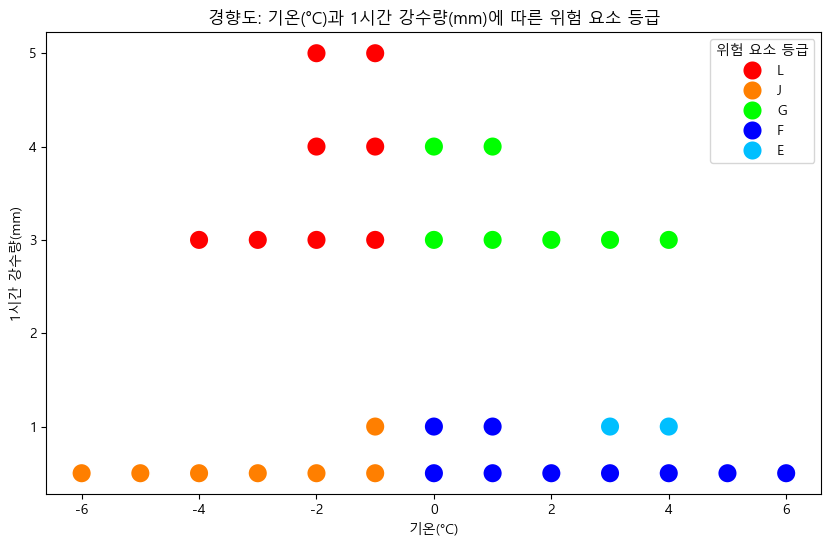

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

# 데이터 로드
df = pd.read_csv("도로위험상황예보.csv")
df['RN_1HR'] = pd.to_numeric(df['RN_1HR'], errors='coerce')  # 문자열 → 숫자형 변환

# 필요한 열만 선택
df = df[['RSK_ELMN_GRD', 'AIRTP', 'RN_1HR']]  

# 첫 번째 인덱스를 제외하고 데이터 저장
df = df.iloc[1:]

# 결측값 제거
df = df.dropna(subset=['RSK_ELMN_GRD', 'AIRTP', 'RN_1HR'])  # 결측값 제거

# AIRTP 열을 숫자형으로 변환 (문자열로 되어 있을 경우 숫자로 변환)
df['AIRTP'] = pd.to_numeric(df['AIRTP'], errors='coerce')

# 기온(AIRTP)의 절댓값을 기준으로 오름차순 정렬
df = df.loc[df['AIRTP'].apply(abs).sort_values().index]

# 위험 요소 등급에 따른 색상 매핑
custom_palette = {
    'L': '#FF0000',    # 가장 높은 위험도 -> 빨강
    'J': '#FF7F00',    # 두번째 위험도 -> 주황
    'G': '#00FF00',    # 낮은 위험도 -> 초록
    'F': '#0000FF',    # 아주 낮은 위험도 -> 파랑 
    'E': '#00BFFF'     # 가장 낮은 위험도 -> 하늘
}

# Seaborn scatterplot으로 경향도 분석
plt.figure(figsize=(10, 6))

# 기온(AIRTP)와 1시간 강수량(RN_1HR)을 'RSK_ELMN_GRD'에 대해 hue로 표시
sns.scatterplot(
    x='AIRTP', 
    y='RN_1HR', 
    hue='RSK_ELMN_GRD', 
    data=df,
    palette=custom_palette,  # 사용자 정의 색상 사용
    hue_order=["L", "J", "G", "F", "E"],  # 범례 순서 지정
    s=200  # 점 크기 지정 (기본값보다 커지게 설정)
)

# 그래프 제목과 레이블 설정
plt.title("경향도: 기온(°C)과 1시간 강수량(mm)에 따른 위험 요소 등급")
plt.xlabel("기온(°C)")
plt.ylabel("1시간 강수량(mm)")

# 범례 설정
plt.legend(title="위험 요소 등급", loc='upper right')

# 그래프 보여주기
plt.show()